In [2]:
from diffusers import StableDiffusionXLPipeline
import torch
pretrained_model_name_or_path = "playgroundai/playground-v2-1024px-aesthetic"


pipe = StableDiffusionXLPipeline.from_pretrained(
    pretrained_model_name_or_path,
    torch_dtype=torch.float16,
    use_safetensors=True,
).to('cuda')
generator = torch.Generator().manual_seed(0)

images = pipe(
    ["<|109|><|1|><|607|><|712|>A man carries <|98|><|269|><|303|><|545|><|426|><|253|><|589|><|580|>chickens as authorities enforced total evacuation of residents living near Taal volcano in Agoncillo town, Batangas province, southern Philippines on Thursday Jan. 16, 2020. Taal volcano belched smaller plumes of ash Thursday but shuddered continuously with earthquakes and cracked roads in nearby towns, which were blockaded by police due to fears of a bigger eruption. (AP Photo/Aaron Favila"],
    guidance_scale=5.0,
    generator=generator,
    width=768,
    height=768,
).images

/root/bigdisk/cu122py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading pipeline components...: 100%|██████████| 7/7 [00:02<00:00,  2.56it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (169 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['|><| 5 8 0 |> chickens as authorities enforced total evacuation of residents living near taal volcano in agoncillo town, batangas province, southern philippines on thursday jan. 1 6, 2 0 2 0. taal volcano belched smaller plumes of ash thursday but shuddered continuously with earthquakes and cracked roads in nearby towns, which were blockaded by police due to fears of a bigger eruption. ( ap photo / aaron favila']
Token indices sequence length is longer than the specified maximum sequence length for this model (169 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was t

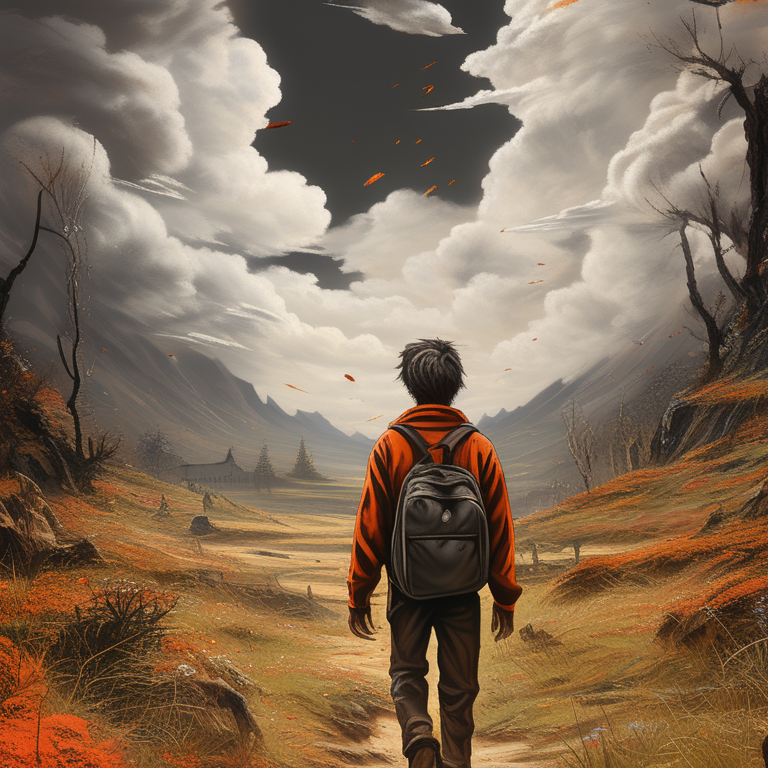

In [3]:
images[0]

In [4]:
from dataset_and_utils import TokenEmbeddingsHandler

embedding_handler = TokenEmbeddingsHandler(
    [pipe.text_encoder, pipe.text_encoder_2], [pipe.tokenizer, pipe.tokenizer_2]
)
embedding_handler.initialize_new_tokens(inserting_toks=[f"<|{idx}|>" for idx in range(1000)]
)

0 text encoder's train_ids: [49408, 49409, 49410, 49411, 49412, 49413, 49414, 49415, 49416, 49417, 49418, 49419, 49420, 49421, 49422, 49423, 49424, 49425, 49426, 49427, 49428, 49429, 49430, 49431, 49432, 49433, 49434, 49435, 49436, 49437, 49438, 49439, 49440, 49441, 49442, 49443, 49444, 49445, 49446, 49447, 49448, 49449, 49450, 49451, 49452, 49453, 49454, 49455, 49456, 49457, 49458, 49459, 49460, 49461, 49462, 49463, 49464, 49465, 49466, 49467, 49468, 49469, 49470, 49471, 49472, 49473, 49474, 49475, 49476, 49477, 49478, 49479, 49480, 49481, 49482, 49483, 49484, 49485, 49486, 49487, 49488, 49489, 49490, 49491, 49492, 49493, 49494, 49495, 49496, 49497, 49498, 49499, 49500, 49501, 49502, 49503, 49504, 49505, 49506, 49507, 49508, 49509, 49510, 49511, 49512, 49513, 49514, 49515, 49516, 49517, 49518, 49519, 49520, 49521, 49522, 49523, 49524, 49525, 49526, 49527, 49528, 49529, 49530, 49531, 49532, 49533, 49534, 49535, 49536, 49537, 49538, 49539, 49540, 49541, 49542, 49543, 49544, 49545, 49546

1 text encoder's train_ids: [49408, 49409, 49410, 49411, 49412, 49413, 49414, 49415, 49416, 49417, 49418, 49419, 49420, 49421, 49422, 49423, 49424, 49425, 49426, 49427, 49428, 49429, 49430, 49431, 49432, 49433, 49434, 49435, 49436, 49437, 49438, 49439, 49440, 49441, 49442, 49443, 49444, 49445, 49446, 49447, 49448, 49449, 49450, 49451, 49452, 49453, 49454, 49455, 49456, 49457, 49458, 49459, 49460, 49461, 49462, 49463, 49464, 49465, 49466, 49467, 49468, 49469, 49470, 49471, 49472, 49473, 49474, 49475, 49476, 49477, 49478, 49479, 49480, 49481, 49482, 49483, 49484, 49485, 49486, 49487, 49488, 49489, 49490, 49491, 49492, 49493, 49494, 49495, 49496, 49497, 49498, 49499, 49500, 49501, 49502, 49503, 49504, 49505, 49506, 49507, 49508, 49509, 49510, 49511, 49512, 49513, 49514, 49515, 49516, 49517, 49518, 49519, 49520, 49521, 49522, 49523, 49524, 49525, 49526, 49527, 49528, 49529, 49530, 49531, 49532, 49533, 49534, 49535, 49536, 49537, 49538, 49539, 49540, 49541, 49542, 49543, 49544, 49545, 49546

In [5]:
ckpt_path = "/root/bigdisk/project_structured_prompt/stage_2_gligen_train/checkpoints/patch_pool/4010"
import os
from safetensors.torch import load_file
unet_path = os.path.join(ckpt_path, "unet.pth")
text_encoder_one_path = os.path.join(ckpt_path, "text_encoder_one.pth")
text_encoder_two_path = os.path.join(ckpt_path, "text_encoder_two.pth")

pipe.unet.load_state_dict(load_file(unet_path))
pipe.text_encoder.load_state_dict(load_file(text_encoder_one_path))
pipe.text_encoder_2.load_state_dict(load_file(text_encoder_two_path))


<All keys matched successfully>

In [6]:
import re
def half_values(string):
        # catch <|int|> and replace with <|int/2|>
        catch = re.findall(r"<\|\d+\|>", string)
        for c in catch:
            val = int(c[2:-2])
            string = string.replace(c, f"<|{val//8}|>")

        return string

process_stringlist = lambda x : [half_values(i) for i in x]

#valid_prompts = process_stringlist(valid_prompts)

  8%|▊         | 4/50 [00:00<00:03, 14.10it/s]

100%|██████████| 50/50 [00:03<00:00, 14.08it/s]


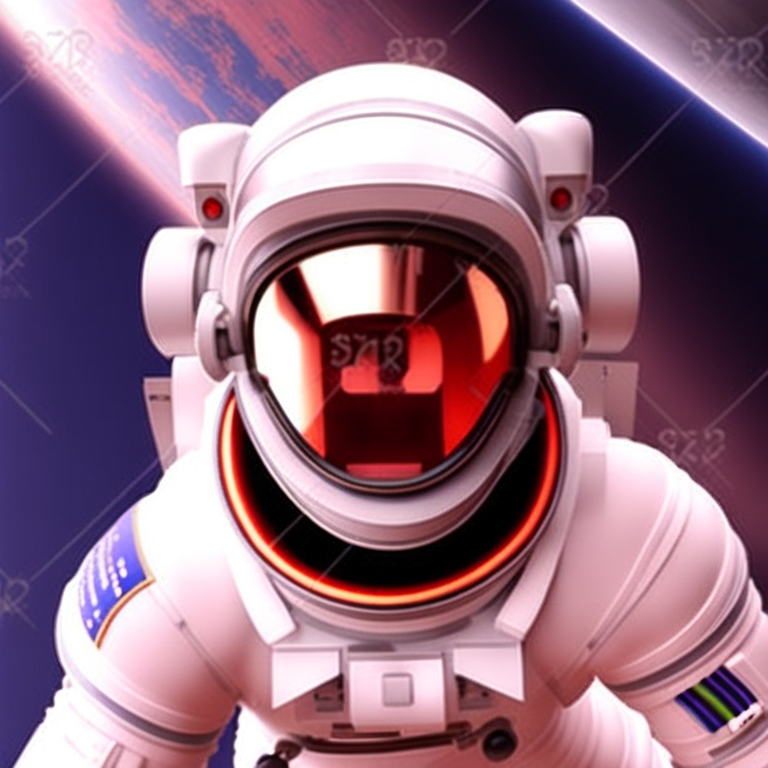

In [12]:
generator = torch.Generator().manual_seed(3)

images = pipe(
    process_stringlist(["An <|700|><|253|><|589|><|580|>astronaut flying in space, 4k, high resolution."]),
    guidance_scale=8.0,
    generator=generator,
    width=768,
    height=768,
).images
images[0]